In [69]:
def reduce_dataset_to_equal_labels(dataset):
    separated = {}
    for i,row in enumerate(dataset):
        class_value = row[-1]
        if(class_value not in separated):
            separated[class_value] = {}
            separated[class_value]["data"] = []
            separated[class_value]["count"] = 0
        separated[class_value]["data"].append(row)
        separated[class_value]["count"] += 1
    
    
    equalized_data = get_equalized_data(separated)
    return equalized_data

In [70]:
def get_equalized_data(classes_data):
    minimum_count = 999999999999999
    for class_value, class_data in classes_data.items():
        if(class_data["count"] < minimum_count):
            minimum_count = class_data["count"]
    
    data = []
    print("Minimum label count:", minimum_count)
    for class_value, class_data in classes_data.items():
        np.random.shuffle(class_data["data"])
        data = data + class_data["data"][:minimum_count]
    
    print("Length of equalized data:", len(data))

    return np.array(data)

In [71]:
def run_equal_labels_test():
    for name,dataset in train_val.items():
        print()
        print("Reducing to equal labels for",name)
        data = reduce_dataset_to_equal_labels(dataset[0])
        print("Running logistic regression on", name)
        model = run_fit(data,"LogisticRegression")
        print()
        print()
        print("Running predictions for",name)
        predictions = run_predict(dataset[0],model)
        print("Testing on original dataset got accuracy of", predictions)
        print("Running 5-fold for",name)
        print("Got k-fold accuracy of:",k_fold_cross_validation(5, data, model_name="LogisticRegression"))
        
        print()


Reducing to equal labels for ionosphere
Minimum label count: 126
Length of equalized data: 252
Running logistic regression on ionosphere


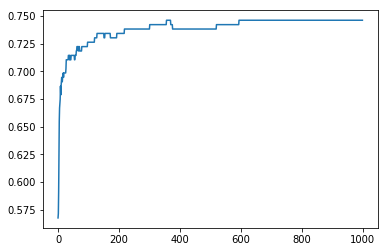



Running predictions for ionosphere
Testing on original dataset got accuracy of 0.8917378917378918
Running 5-fold for ionosphere


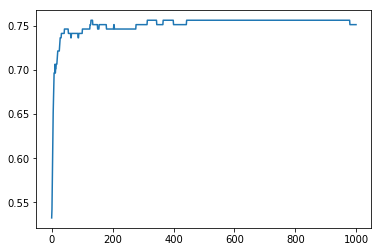

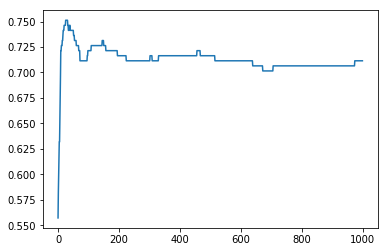

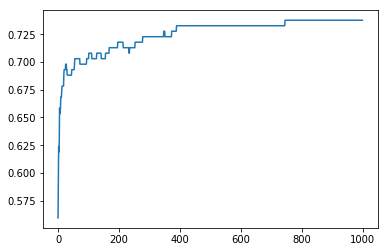

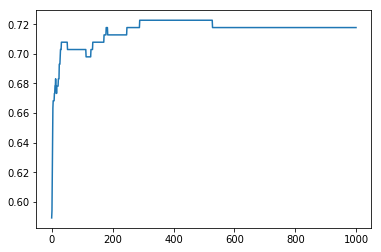

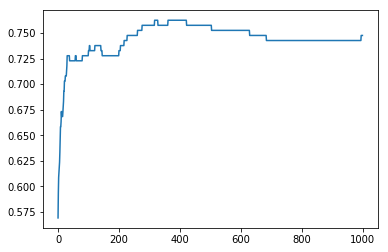

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.2325           0.2353           0.2297
1  Predict           0.0001           0.0001           0.0001
2    Total           0.2326           0.2353           0.2298
Got k-fold accuracy of: 0.8139607843137254


Reducing to equal labels for adult
Minimum label count: 11208
Length of equalized data: 22416
Running logistic regression on adult


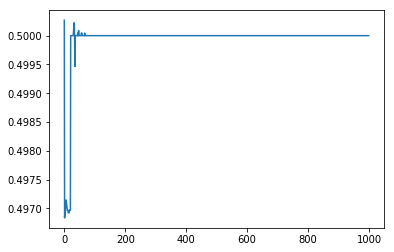



Running predictions for adult
Testing on original dataset got accuracy of 0.2478439697492371
Running 5-fold for adult


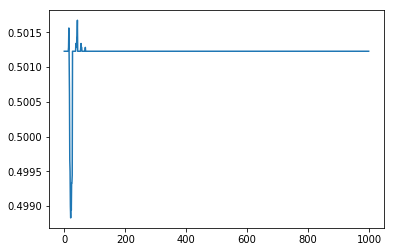

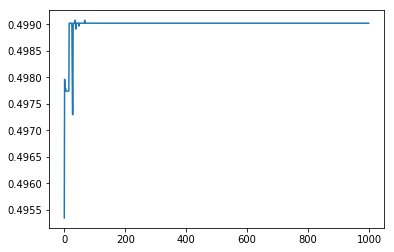

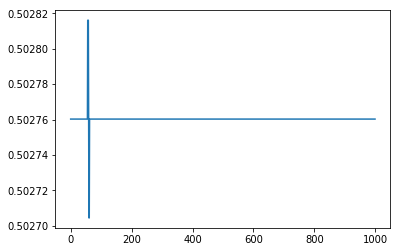

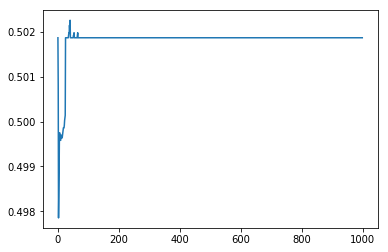

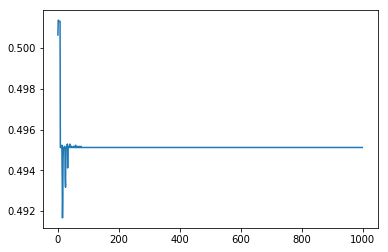

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit          88.7481          94.0081          84.9712
1  Predict           0.0014           0.0019           0.0010
2    Total          88.7495          94.0100          84.9722
Got k-fold accuracy of: 0.5322107921629993


Reducing to equal labels for thoracic_surgery
Minimum label count: 70
Length of equalized data: 140
Running logistic regression on thoracic_surgery


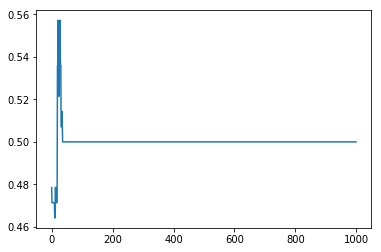



Running predictions for thoracic_surgery
Testing on original dataset got accuracy of 0.8361702127659575
Running 5-fold for thoracic_surgery


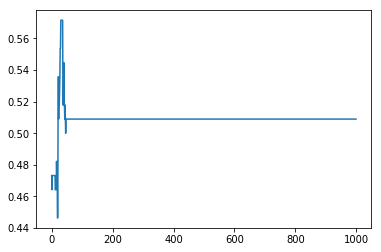

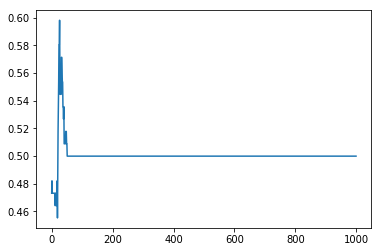

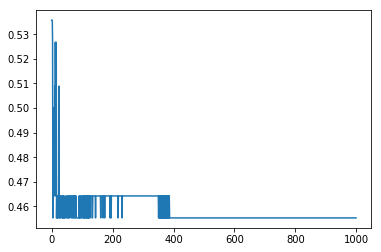

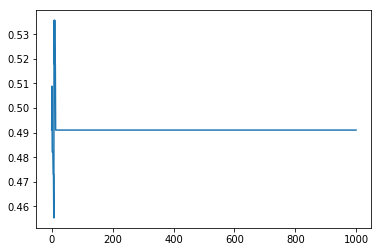

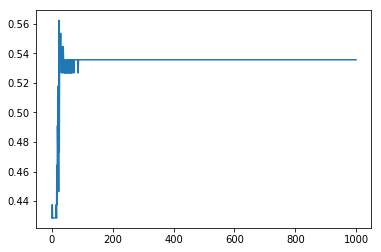

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.1887           0.1913           0.1869
1  Predict           0.0001           0.0001           0.0001
2    Total           0.1888           0.1914           0.1870
Got k-fold accuracy of: 0.5285714285714286


Reducing to equal labels for credit_card
Minimum label count: 6636
Length of equalized data: 13272
Running logistic regression on credit_card


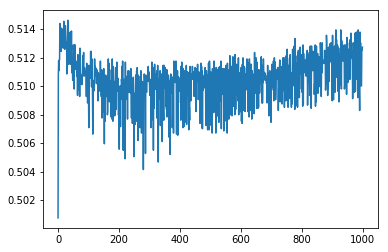



Running predictions for credit_card
Testing on original dataset got accuracy of 0.31306666666666666
Running 5-fold for credit_card


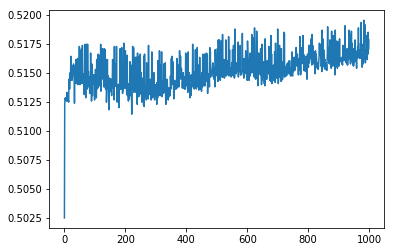

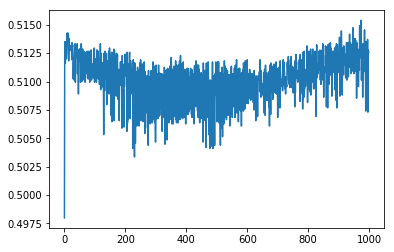

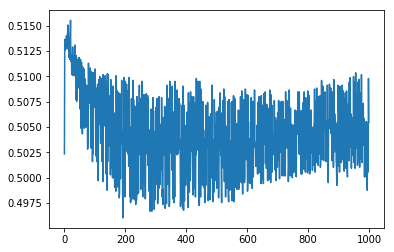

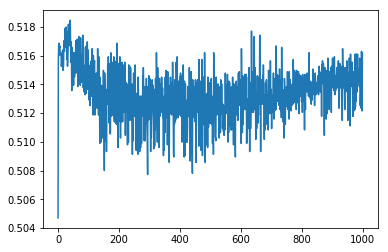

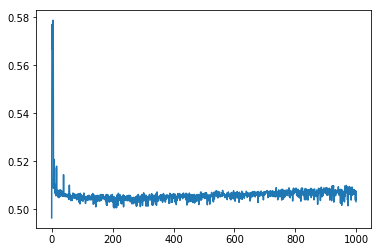

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           7.1035           7.1608           7.0505
1  Predict           0.0004           0.0006           0.0004
2    Total           7.1039           7.1611           7.0509
Got k-fold accuracy of: 0.5320994497876211



In [72]:
run_equal_labels_test()